In [1]:
import numpy as np
import pandas as pd
from warnings import simplefilter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler as ss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('ZAlizadeh.csv')
df

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,Male,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,N,Cad
299,55,64,152,Fmale,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,mild,Normal
300,48,77,160,Fmale,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,N,Normal
301,57,90,159,Fmale,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,N,Normal


In [3]:
df.isnull().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
F

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [5]:
df.describe()

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,...,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,...,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,...,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,...,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,...,90.000000,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000


In [6]:
df = df.dropna(axis=0)

In [7]:
df.shape

(303, 55)

In [8]:
df = df.dropna(axis=1)

In [9]:
df

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,Male,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,N,Cad
299,55,64,152,Fmale,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,mild,Normal
300,48,77,160,Fmale,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,N,Normal
301,57,90,159,Fmale,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,N,Normal


In [10]:
vhd = {"N": 0, "mild": 1, "Moderate": 2, "Severe": 3}
sex = {"Male": "Male", "Fmale": "Female"}

df['VHD'] = df['VHD'].map(vhd)
df['Sex'] = df['Sex'].map(sex)

df.replace('N', 0, inplace=True)
df.replace('Y', 1, inplace=True)

In [11]:
cath = {"Cad": 1, "Normal":0}
df['Cath'] = df['Cath'].map(cath)

In [12]:
df

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,0,1
1,67,70,157,Female,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,0,1
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,1,1
3,66,67,158,Female,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,3,0
4,50,87,153,Female,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,Male,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,0,1
299,55,64,152,Female,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,1,0
300,48,77,160,Female,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,0,0
301,57,90,159,Female,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,0,0


In [13]:
sex = {"Male": 1, "Female": 0}
df['Sex'] = df['Sex'].map(sex)


In [14]:
df

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,0,1
1,67,70,157,0,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,0,1
2,54,54,164,1,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,1,1
3,66,67,158,0,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,3,0
4,50,87,153,0,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,1,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,0,1
299,55,64,152,0,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,1,0
300,48,77,160,0,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,0,0
301,57,90,159,0,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    int64  
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    int64  
 11  CRF                    303 non-null    int64  
 12  CVA                    303 non-null    int64  
 13  Airway disease         303 non-null    int64  
 14  Thyroid Disease        303 non-null    int64  
 15  CHF   

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,58.897690,10.392278,30.000000,51.00000,58.00000,66.000000,86.000000
Weight,303.0,73.831683,11.987358,48.000000,65.00000,74.00000,81.000000,120.000000
Length,303.0,164.716172,9.327661,140.000000,158.00000,165.00000,171.000000,188.000000
Sex,303.0,0.580858,0.494235,0.000000,0.00000,1.00000,1.000000,1.000000
BMI,303.0,27.248339,4.098865,18.115413,24.51438,26.77551,29.411765,40.900658
DM,303.0,0.297030,0.457706,0.000000,0.00000,0.00000,1.000000,1.000000
HTN,303.0,0.590759,0.492507,0.000000,0.00000,1.00000,1.000000,1.000000
Current Smoker,303.0,0.207921,0.406491,0.000000,0.00000,0.00000,0.000000,1.000000
EX-Smoker,303.0,0.033003,0.178941,0.000000,0.00000,0.00000,0.000000,1.000000
FH,303.0,0.158416,0.365734,0.000000,0.00000,0.00000,0.000000,1.000000


In [17]:
df.shape

(303, 55)

In [18]:
df = df.drop_duplicates()

In [19]:
df.shape

(303, 55)

In [20]:
df.duplicated().sum()

0

In [21]:
X = df.drop('Cath', axis=1)  # Features
y = df['Cath']  # Target variable



In [22]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression


In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
lr_pred = model.predict(X_test)

Accuracy: 0.8289473684210527


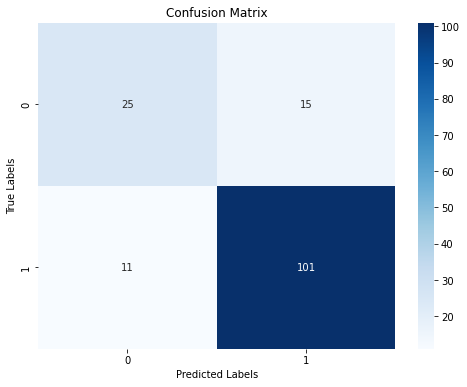

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, lr_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# SVM

# Linear Kernel

In [27]:
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
svm_l_pred = svm_model.predict(X_test)

Accuracy: 0.7631578947368421


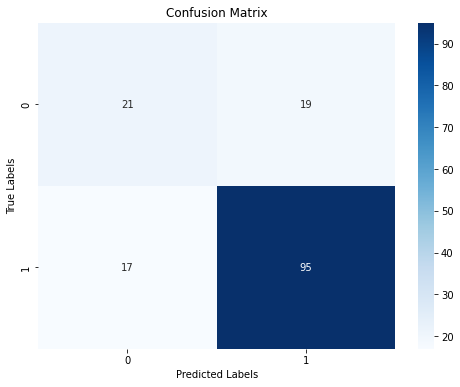

In [29]:
# Calculate accuracy
accuracy = accuracy_score(y_test, svm_l_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, svm_l_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Polynomial Kernel

In [30]:
svm_model = SVC(kernel='poly') 
svm_model.fit(X_train, y_train)

SVC(kernel='poly')

In [31]:
svm_p_pred = svm_model.predict(X_test)

Accuracy: 0.7302631578947368


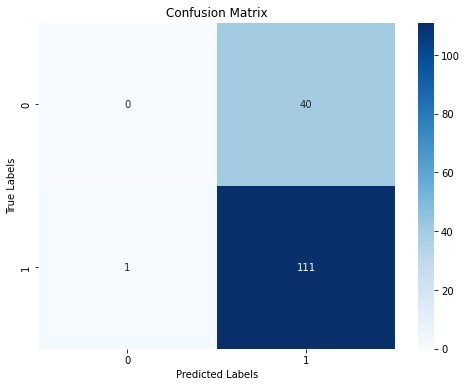

In [32]:
# Calculate accuracy
accuracy = accuracy_score(y_test, svm_p_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, svm_p_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# RBF Kernel

In [33]:
svm_model = SVC(kernel='rbf') 
svm_model.fit(X_train, y_train)

SVC()

In [34]:
svm_r_pred = svm_model.predict(X_test)

Accuracy: 0.8289473684210527


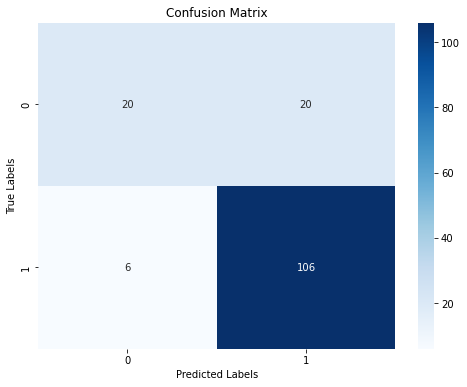

In [35]:
# Calculate accuracy
accuracy = accuracy_score(y_test, svm_r_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, svm_r_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

GaussianNB()

In [38]:
nb_pred = nb_classifier.predict(X_test)

Accuracy: 0.5197368421052632


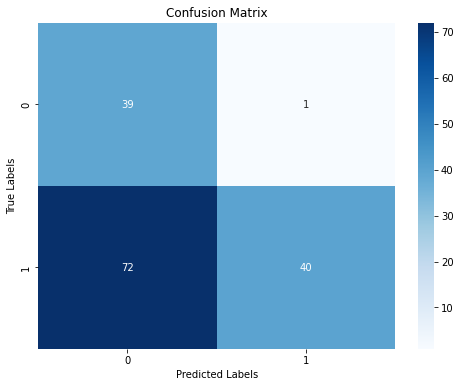

In [39]:
# Calculate accuracy
accuracy = accuracy_score(y_test, nb_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, nb_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
dt_predictions = dt_model.predict(X_test)

Accuracy: 0.7960526315789473


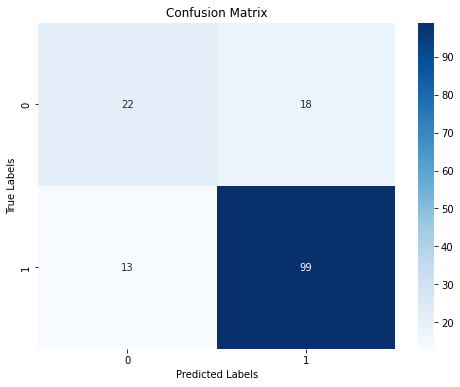

In [43]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, dt_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
rf_predictions = rf_model.predict(X_test)


Accuracy: 0.868421052631579


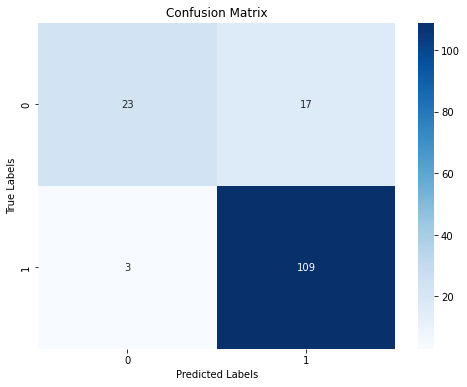

In [47]:
# Calculate accuracy
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# KNN

In [48]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn_model = sklearn.neighbors.KNeighborsClassifier()


In [50]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
knn_predictions = knn_model.predict(X_test)


Accuracy: 0.7763157894736842


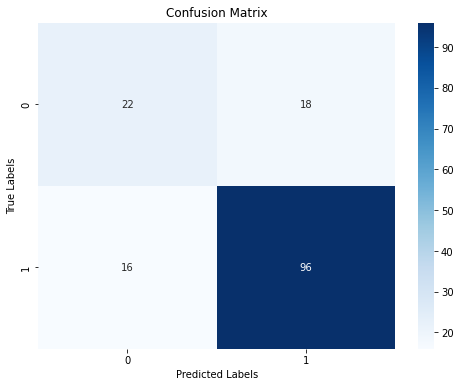

In [52]:
# Calculate accuracy
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [55]:
gb_predictions = gb_model.predict(X_test)


Accuracy: 0.8486842105263158


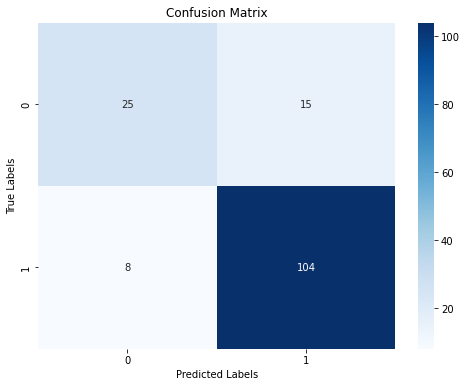

In [56]:
# Calculate accuracy
accuracy = accuracy_score(y_test, gb_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, gb_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# ELM Classifier

In [57]:
from sklearn_extensions.extreme_learning_machines.elm import ELMClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass neg_label=-1, pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [58]:
elm = ELMClassifier() 
elm.fit(X_train, y_train)

ELMClassifier()

In [59]:
elm_pred = elm.predict(X_test)


Accuracy: 0.7828947368421053


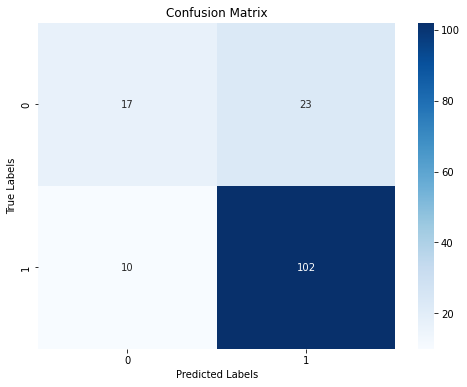

In [60]:
# Calculate accuracy
accuracy = accuracy_score(y_test, elm_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, elm_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Adaboost Classifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
# Create a base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=1)  # Stump

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
adaboost_pred = adaboost_classifier.predict(X_test)



Accuracy: 0.8881578947368421


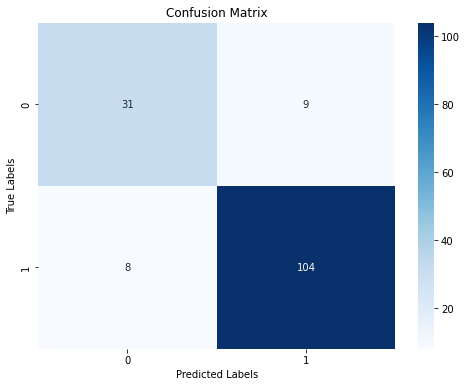

In [63]:
# Calculate accuracy
accuracy = accuracy_score(y_test, adaboost_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, adaboost_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Ridge Classifier

In [64]:
from sklearn.linear_model import RidgeClassifier

In [65]:
# Create a Ridge Classifier
ridge_classifier = RidgeClassifier(alpha=1.0, random_state=42)  # alpha is the regularization parameter

# Train the Ridge Classifier
ridge_classifier.fit(X_train, y_train)

# Make predictions on the test set
ridge_pred = ridge_classifier.predict(X_test)


Accuracy: 0.8421052631578947


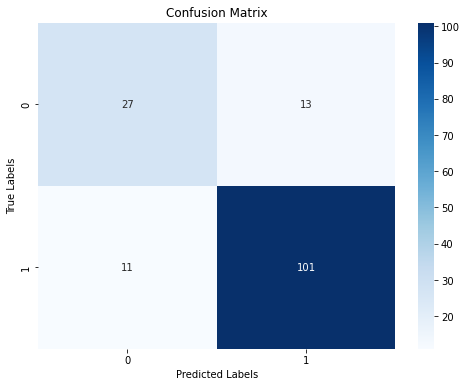

In [66]:
# Calculate accuracy
accuracy = accuracy_score(y_test, ridge_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, ridge_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Lasso Classifier

In [67]:
from sklearn.linear_model import Lasso

In [68]:
# Create a Lasso Classifier
lasso_classifier = Lasso(alpha=1.0, random_state=42)  # alpha is the regularization parameter

# Train the Lasso Classifier
lasso_classifier.fit(X_train, y_train)

# Make predictions on the test set
lasso_pred = lasso_classifier.predict(X_test)

# Convert predictions to class labels (for classification)
lasso_pred_class = [round(val) for val in lasso_pred]



Accuracy: 0.7368421052631579


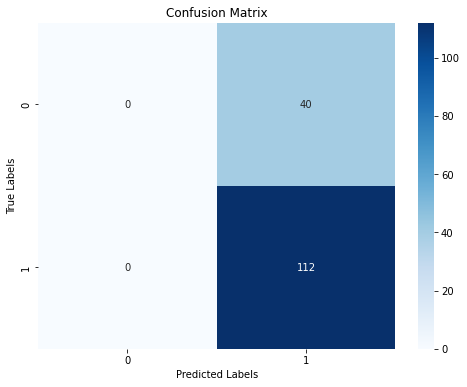

In [69]:
# Calculate accuracy
accuracy = accuracy_score(y_test, lasso_pred_class)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, lasso_pred_class)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Passive Aggressive Classifier

In [70]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [71]:
# Create a Passive-Aggressive Classifier
pa_classifier = PassiveAggressiveClassifier(C=1.0, random_state=42)  # C is the regularization parameter

# Train the Passive-Aggressive Classifier
pa_classifier.fit(X_train, y_train)

# Make predictions on the test set
pa_pred = pa_classifier.predict(X_test)



Accuracy: 0.7894736842105263


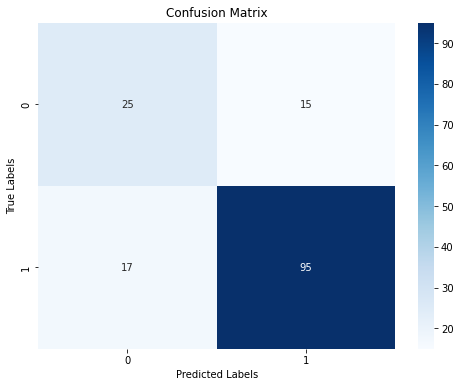

In [72]:
# Calculate accuracy
accuracy = accuracy_score(y_test, pa_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, pa_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Gaussian Process Classifier

In [73]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


In [74]:
# Create a Gaussian Process Classifier
kernel = 1.0 * RBF(length_scale=1.0)  # Radial basis function (RBF) kernel
gp_classifier = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the Gaussian Process Classifier
gp_classifier.fit(X_train, y_train)

# Make predictions on the test set
gp_pred = gp_classifier.predict(X_test)



Accuracy: 0.8552631578947368


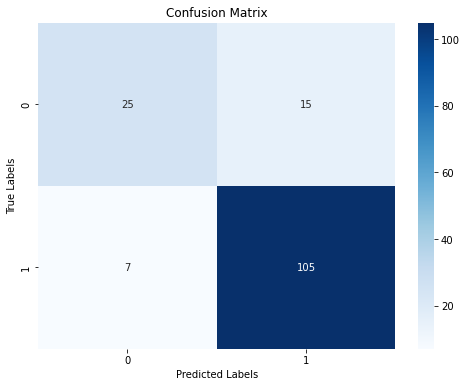

In [75]:
# Calculate accuracy
accuracy = accuracy_score(y_test, gp_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, gp_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Nearest Centroid Classifier

In [76]:
from sklearn.neighbors import NearestCentroid


In [77]:
# Create a Nearest Centroid Classifier
centroid_classifier = NearestCentroid()

# Train the Nearest Centroid Classifier
centroid_classifier.fit(X_train, y_train)

# Make predictions on the test set
ncc_pred = centroid_classifier.predict(X_test)



Accuracy: 0.8486842105263158


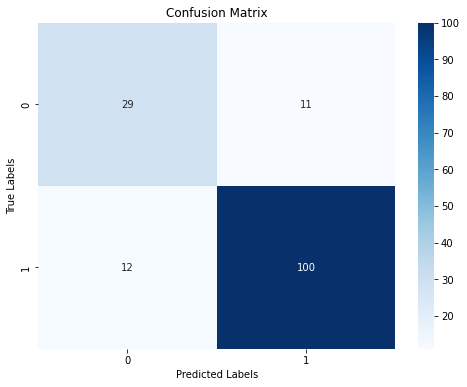

In [78]:
# Calculate accuracy
accuracy = accuracy_score(y_test, ncc_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, ncc_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [79]:
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
# Combine predictions using majority voting
ensemble_pred = np.round((lr_pred + svm_l_pred + svm_p_pred + svm_r_pred + rf_predictions + knn_predictions + gb_predictions + adaboost_pred + ridge_pred + gp_pred) / 10)


In [81]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_pred)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, ensemble_pred)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[ 24  16]
 [  7 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.60      0.68        40
           1       0.87      0.94      0.90       112

    accuracy                           0.85       152
   macro avg       0.82      0.77      0.79       152
weighted avg       0.84      0.85      0.84       152



In [82]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import cross_val_score

In [83]:
# List of base models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("SVM Linear Kernel", SVC(kernel="linear")),
    ("SVM Polynomial Kernel", SVC(kernel="poly")),
    ("SVM RBF Kernel", SVC(kernel="rbf")),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=100, random_state=42)),
    ("Ridge Classifier", RidgeClassifier()),
    ("Gaussian Process Classifier", GaussianProcessClassifier(random_state=42))
]

In [84]:
# Train and validate base models
base_model_predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    base_model_predictions.append(predictions)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} - Accuracy: {accuracy:.4f}")


Logistic Regression - Accuracy: 0.8289
SVM Linear Kernel - Accuracy: 0.7632
SVM Polynomial Kernel - Accuracy: 0.7303
SVM RBF Kernel - Accuracy: 0.8289
Random Forest - Accuracy: 0.8553
KNN - Accuracy: 0.7763
Gradient Boosting - Accuracy: 0.8487
AdaBoost - Accuracy: 0.8618
Ridge Classifier - Accuracy: 0.8421
Gaussian Process Classifier - Accuracy: 0.7237


In [85]:
# Create a meta-classifier (ensemble) for combining predictions
meta_classifier_input = np.array(base_model_predictions).T
meta_classifier = XGBClassifier(n_estimators=100, random_state=42)
meta_classifier.fit(meta_classifier_input, y_test)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [86]:
# Evaluate the ensemble on the validation set
ensemble_pred = []
for predictions in base_model_predictions:
    ensemble_pred.append(predictions)
ensemble_pred = np.array(ensemble_pred).T
meta_predictions = meta_classifier.predict(ensemble_pred)


In [87]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, meta_predictions)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, meta_predictions)
print("Classification Report:")
print(class_report)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, meta_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

Confusion Matrix:
[[ 31   9]
 [  3 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        40
           1       0.92      0.97      0.95       112

    accuracy                           0.92       152
   macro avg       0.92      0.87      0.89       152
weighted avg       0.92      0.92      0.92       152

Ensemble Accuracy: 0.9211


In [88]:
# List of base models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("SVM Linear Kernel", SVC(kernel="linear")),
    ("SVM Polynomial Kernel", SVC(kernel="poly")),
    ("SVM RBF Kernel", SVC(kernel="rbf")),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("XGB Classifier", XGBClassifier(n_estimators=100, random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=100, random_state=42)),
    ("Gaussian Process Classifier", GaussianProcessClassifier(random_state=42))
]

In [89]:
# Train and validate base models
base_model_predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    base_model_predictions.append(predictions)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} - Accuracy: {accuracy:.4f}")


Logistic Regression - Accuracy: 0.8289
SVM Linear Kernel - Accuracy: 0.7632
SVM Polynomial Kernel - Accuracy: 0.7303
SVM RBF Kernel - Accuracy: 0.8289
Random Forest - Accuracy: 0.8553
XGB Classifier - Accuracy: 0.8882
KNN - Accuracy: 0.7763
Gradient Boosting - Accuracy: 0.8487
AdaBoost - Accuracy: 0.8618
Gaussian Process Classifier - Accuracy: 0.7237


In [90]:
# Create a meta-classifier (ensemble) for combining predictions
meta_classifier_input = np.array(base_model_predictions).T
meta_classifier = XGBClassifier(n_estimators=100, random_state=42)
meta_classifier.fit(meta_classifier_input, y_test)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [91]:
# Evaluate the ensemble on the validation set
ensemble_pred = []
for predictions in base_model_predictions:
    ensemble_pred.append(predictions)
ensemble_pred = np.array(ensemble_pred).T
meta_predictions = meta_classifier.predict(ensemble_pred)


In [92]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, meta_predictions)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, meta_predictions)
print("Classification Report:")
print(class_report)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, meta_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

Confusion Matrix:
[[ 32   8]
 [  2 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        40
           1       0.93      0.98      0.96       112

    accuracy                           0.93       152
   macro avg       0.94      0.89      0.91       152
weighted avg       0.93      0.93      0.93       152

Ensemble Accuracy: 0.9342


In [93]:
# List of base models

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

svm_l_model = SVC(kernel="linear")
svm_l_model.fit(X_train, y_train)

svm_p_model = SVC(kernel="poly")
svm_p_model.fit(X_train, y_train)

svm_r_model = SVC(kernel="rbf")
svm_r_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)

xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

gpc_model = GaussianProcessClassifier(random_state=42)
gpc_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
svm_l_predictions = svm_l_model.predict(X_test)
svm_p_predictions = svm_p_model.predict(X_test)
svm_r_predictions = svm_r_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
ab_predictions = ab_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
gpc_predictions = gpc_model.predict(X_test)


# Combine predictions using ensemble (Voting Classifier)
ensemble_predictions = np.column_stack((lr_predictions, svm_l_predictions, svm_p_predictions, svm_r_predictions, 
                                        rf_predictions, knn_predictions, gb_predictions, 
                                        ab_predictions, xgb_predictions, gpc_predictions))


# Perform majority voting to get the final prediction
final_predictions = np.mean(ensemble_predictions, axis=1) >= 0.5
final_predictions = final_predictions.astype("int32")

# Calculate accuracy of the ensemble
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, final_predictions)
print("Classification Report:")
print(class_report)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

Ensemble Accuracy: 0.8289
Confusion Matrix:
[[ 19  21]
 [  5 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.47      0.59        40
           1       0.84      0.96      0.89       112

    accuracy                           0.83       152
   macro avg       0.81      0.72      0.74       152
weighted avg       0.82      0.83      0.81       152

Ensemble Accuracy: 0.8289
